## 오버샘플링 처리 모델 비교.ipynb -> 높이 단위가 다른 이유로 DB 전처리 후 다시 수행
1. 하천 수위 단위(cm), 교량 높이(m)
2. 데이터 전처리 ->  (교량 높이 * 100) + 하천 수위 최빈값 = 최종 수정된 교량 높이(cm)
3. kmeans clustering -> 점과 점사이의 거리를 통해 cluster를 만듦으로써 flooding 컬럼을 만드는 기준으로 부적합하다고 판단
4. 클러스터를 위한 가짜 데이터 생성 및 기존 데이터 임의로 삭제

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('C:\\jupyter_notebook_file\\교량_기준_임시_최종db.csv')
df

,Unnamed: 0,Unnamed: 0.1,bridge_name,address,etc_address,latitude,longitude,brid_height_origin,location_start,wl_station_code,rf_station_code,obs_date,WL,rainfall,bridge_height
0,0,0,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 12:00:00,3.0,0.0,510.0
1,1,1,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 13:00:00,6.0,0.0,510.0
2,2,2,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 14:00:00,10.0,0.0,510.0
3,3,3,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 15:00:00,14.0,0.0,510.0
4,4,4,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 16:00:00,18.0,0.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097827,4097827,4381107,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 17:00:00,184.0,0.0,483.0
4097828,4097828,4381108,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 18:00:00,184.0,0.0,483.0
4097829,4097829,4381109,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 19:00:00,185.0,0.0,483.0
4097830,4097830,4381110,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 20:00:00,185.0,0.0,483.0


# kmeans clustering을 통한 flooding(cluster_id) 컬럼 추가
- 교량 높이(1000cm) 구간을 기준으로 군집화로 나눠짐
- 따라서 이 구간에 가짜 데이터 생성하여 보완

In [5]:
from sklearn.cluster import KMeans
import seaborn as sns

Text(-2.700000000000003, 0.5, 'wl')

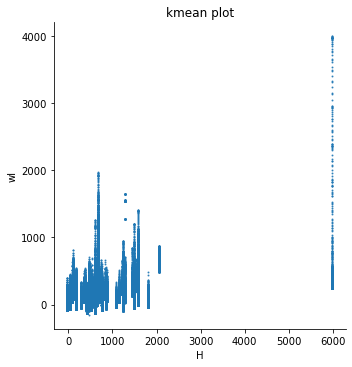

In [25]:
# 시각화 수위, 교량 높이
sns.lmplot('bridge_height', 'WL', data=df, fit_reg=False, scatter_kws={'s':1})
plt.title('kmean plot')
plt.xlabel('H')
plt.ylabel('wl')

In [21]:
data_points = df.loc[:, ['WL', 'bridge_height']].values
kmeans = KMeans(n_clusters=2).fit(data_points) # 2개의 클러스터를 찾는 것
kmeans.labels_ # 각 데이터에 대한  클러스터 결과물
df['Flooding'] = kmeans.labels_ # 변수 y로 쓸 침수 이력
df

,Unnamed: 0,Unnamed: 0.1,bridge_name,address,etc_address,latitude,longitude,brid_height_origin,location_start,wl_station_code,rf_station_code,obs_date,WL,rainfall,bridge_height,Flooding
0,0,0,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 12:00:00,3.0,0.0,510.0,0
1,1,1,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 13:00:00,6.0,0.0,510.0,0
2,2,2,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 14:00:00,10.0,0.0,510.0,0
3,3,3,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 15:00:00,14.0,0.0,510.0,0
4,4,4,신원교,경기도,이천시,37.291282,127.509880,5.4,"[37.291282, 127.50988000000001]",1007645,10074060,2010-02-25 16:00:00,18.0,0.0,510.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097827,4097827,4381107,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 17:00:00,184.0,0.0,483.0,0
4097828,4097828,4381108,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 18:00:00,184.0,0.0,483.0,0
4097829,4097829,4381109,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 19:00:00,185.0,0.0,483.0,0
4097830,4097830,4381110,대곡교,서울특별시,강남구,37.468243,127.121565,3.0,"[37.468243, 127.12156499999999]",1018655,10184100,2017-06-26 20:00:00,185.0,0.0,483.0,0


Text(0.5, 1.0, 'kmean plot ver2')

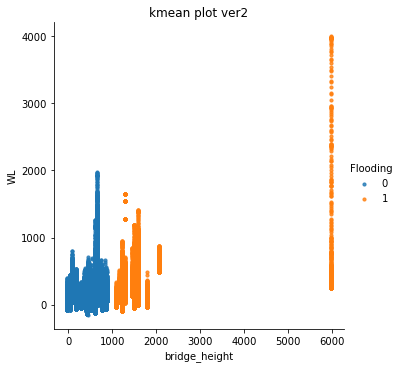

In [22]:
sns.lmplot('bridge_height', 'WL', data=df, fit_reg=False,scatter_kws={'s':10},hue='Flooding') # x축, y축, data, no line, marker size
plt.title('kmean plot ver2')

대략 200cm 점과 점 사이의 거리를 기준으로 클러스터링(?)하는 것으로 예상.
혹은 가장 점과 점 사이 거리가 먼 곳을 기준으로 할 수도 있다

In [38]:
brid_list = pd.unique(df['bridge_height']).tolist()
brid_list.sort()
brid_list

[-30.0,
 46.0,
 86.0,
 96.0,
 175.0,
 286.0,
 353.0,
 365.0,
 383.0,
 408.0,
 429.0,
 455.0,
 461.0,
 481.0,
 483.0,
 500.0,
 510.0,
 548.0,
 588.0,
 600.0,
 616.0,
 625.0,
 631.0,
 652.0,
 659.0,
 661.0,
 665.0,
 677.0,
 682.0,
 719.0,
 734.0,
 748.0,
 752.0,
 762.0,
 770.0,
 839.0,
 861.0,
 876.0,
 1081.0,
 1147.0,
 1219.0,
 1236.0,
 1291.0,
 1444.0,
 1496.0,
 1497.0,
 1564.0,
 1582.0,
 1802.0,
 2065.0,
 5985.0]

In [72]:
wl_list = []
for i in range(len(brid_list)):
    tmp = pd.unique(df[df['bridge_height']==brid_list[i]]['WL']).tolist()
    wl_list.append(tmp)
    wl_list[i].sort()
wl_list

[[-86.0,
  -85.0,
  -84.0,
  -83.0,
  -82.0,
  -81.0,
  -80.0,
  -79.0,
  -78.0,
  -77.0,
  -76.0,
  -75.0,
  -74.0,
  -73.0,
  -72.0,
  -71.0,
  -70.0,
  -69.0,
  -68.0,
  -67.0,
  -66.0,
  -65.0,
  -64.0,
  -63.0,
  -62.0,
  -61.0,
  -60.0,
  -59.0,
  -58.0,
  -57.0,
  -56.0,
  -55.0,
  -54.0,
  -53.0,
  -52.0,
  -51.0,
  -50.0,
  -49.0,
  -48.0,
  -47.0,
  -46.0,
  -45.0,
  -44.0,
  -43.0,
  -42.0,
  -41.0,
  -40.0,
  -39.0,
  -38.0,
  -37.0,
  -36.0,
  -35.0,
  -34.0,
  -33.0,
  -32.0,
  -31.0,
  -30.0,
  -29.0,
  -28.0,
  -27.0,
  -26.0,
  -25.0,
  -24.0,
  -23.0,
  -22.0,
  -21.0,
  -20.0,
  -19.0,
  -18.0,
  -17.0,
  -16.0,
  -15.0,
  -14.0,
  -13.0,
  -12.0,
  -11.0,
  -10.0,
  -9.0,
  -8.0,
  -7.0,
  -6.0,
  -5.0,
  -4.0,
  -3.0,
  -2.0,
  -1.0,
  0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  14.38,
  14.85,
  15.0,
  15.31,
  15.77,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
 

In [128]:
# clustering 전 점과 점 사이의 거리가 넓은 부분(빈 부분)에 가짜 데이터 추가
df_for_cluster = df
for a in range(0,5):
    for i in range(0,9):
        tmp_data = {'WL':i*100, 'bridge_height':950}
        df_for_cluster=df_for_cluster.append(tmp_data, ignore_index=True)

    for i in range(0,10):
        tmp_data = {'WL':i*100, 'bridge_height':1030}
        df_for_cluster=df_for_cluster.append(tmp_data, ignore_index=True)

    for i in range(0,13):
        tmp_data = {'WL':i*100, 'bridge_height':1350}
        df_for_cluster=df_for_cluster.append(tmp_data, ignore_index=True)

    for i in range(0,16):
        tmp_data = {'WL':i*100, 'bridge_height':1680}
        df_for_cluster=df_for_cluster.append(tmp_data, ignore_index=True)

    for i in range(0,19):
        tmp_data = {'WL':i*100, 'bridge_height':1900}
        df_for_cluster=df_for_cluster.append(tmp_data, ignore_index=True)

In [129]:
df_del_row = df_for_cluster

for i in range(len(brid_list)): # bridge_height 마다 교량의 높이 +- 100 범위의 row 제거
    tmp_df = df_for_cluster
    tmp_df = df_del_row[df_del_row['bridge_height']==brid_list[i]]
    tmp = tmp_df[(tmp_df['WL'] > (brid_list[i] - 100)) & (tmp_df['WL'] < (brid_list[i] + 100))].index
    df_del_row = df_del_row.drop(tmp)
#     df_del_row.drop(tmp)

In [130]:
len(df_for_cluster), len(df_del_row)

(4098167, 3483599)

Text(-2.700000000000003, 0.5, 'wl')

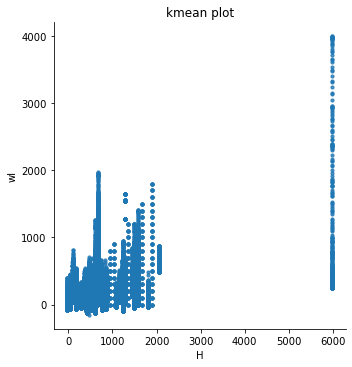

In [131]:
# 가짜 데이터프레임 시각화 수위, 교량 높이
sns.lmplot('bridge_height', 'WL', data=df_for_cluster, fit_reg=False, scatter_kws={'s':10})
plt.title('kmean plot')
plt.xlabel('H')
plt.ylabel('wl')

Text(-2.700000000000003, 0.5, 'wl')

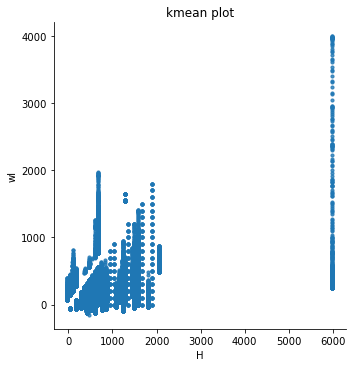

In [132]:
# 가짜 데이터프레임 + 군집화 위한 데이터 삭제: 시각화 수위, 교량 높이
sns.lmplot('bridge_height', 'WL', data=df_del_row, fit_reg=False, scatter_kws={'s':10})
plt.title('kmean plot')
plt.xlabel('H')
plt.ylabel('wl')

In [133]:
data_points = df_for_cluster.loc[:, ['WL', 'bridge_height']].values
kmeans = KMeans(n_clusters=2).fit(data_points) # 2개의 클러스터를 찾는 것
kmeans.labels_ # 각 데이터에 대한  클러스터 결과물
df_for_cluster['Flooding'] = kmeans.labels_ # 변수 y로 쓸 침수 이력
df_for_cluster

,Unnamed: 0,Unnamed: 0.1,bridge_name,address,etc_address,latitude,longitude,brid_height_origin,location_start,wl_station_code,rf_station_code,obs_date,WL,rainfall,bridge_height,Flooding
0,0.0,0.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 12:00:00,3.0,0.0,510.0,0
1,1.0,1.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 13:00:00,6.0,0.0,510.0,0
2,2.0,2.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 14:00:00,10.0,0.0,510.0,0
3,3.0,3.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 15:00:00,14.0,0.0,510.0,0
4,4.0,4.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 16:00:00,18.0,0.0,510.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,NaN,1900.0,1
4098163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,1900.0,1
4098164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,NaN,1900.0,1
4098165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,1900.0,1


In [134]:
data_points = df_del_row.loc[:, ['WL', 'bridge_height']].values
kmeans = KMeans(n_clusters=2).fit(data_points) # 2개의 클러스터를 찾는 것
kmeans.labels_ # 각 데이터에 대한  클러스터 결과물
df_del_row['Flooding'] = kmeans.labels_ # 변수 y로 쓸 침수 이력
df_del_row

,Unnamed: 0,Unnamed: 0.1,bridge_name,address,etc_address,latitude,longitude,brid_height_origin,location_start,wl_station_code,rf_station_code,obs_date,WL,rainfall,bridge_height,Flooding
0,0.0,0.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 12:00:00,3.0,0.0,510.0,0
1,1.0,1.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 13:00:00,6.0,0.0,510.0,0
2,2.0,2.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 14:00:00,10.0,0.0,510.0,0
3,3.0,3.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 15:00:00,14.0,0.0,510.0,0
4,4.0,4.0,신원교,경기도,이천시,37.291282,127.50988,5.4,"[37.291282, 127.50988000000001]",1007645.0,10074060.0,2010-02-25 16:00:00,18.0,0.0,510.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,NaN,1900.0,1
4098163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,1900.0,1
4098164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,NaN,1900.0,1
4098165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,1900.0,1


Text(0.5, 1.0, 'kmean plot ver2')

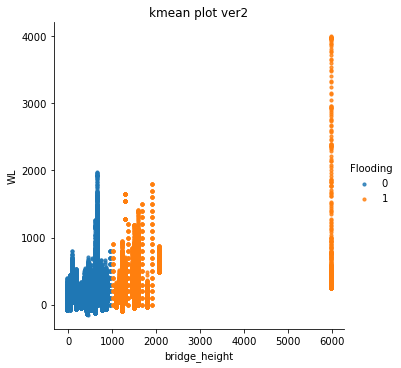

In [135]:
sns.lmplot('bridge_height', 'WL', data=df_for_cluster, fit_reg=False,scatter_kws={'s':10},hue='Flooding') # x축, y축, data, no line, marker size
plt.title('kmean plot ver2')

Text(0.5, 1.0, 'kmean plot ver2')

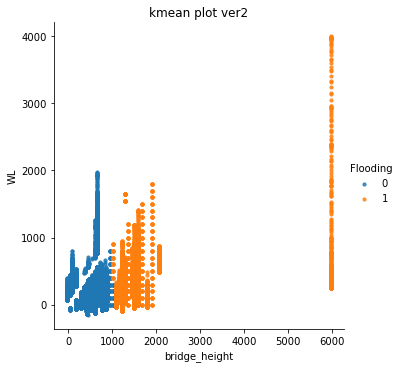

In [136]:
sns.lmplot('bridge_height', 'WL', data=df_del_row, fit_reg=False,scatter_kws={'s':10},hue='Flooding') # x축, y축, data, no line, marker size
plt.title('kmean plot ver2')

- 결론: 클러스터링을 통한 종속 변수 y인 침수 여부를 생성하기에 부적합하다고 판단
- 독립 변수x: 강수량, 종속 변수y: 하천 수위로 모델 학습 및 생성하기로 결정

Train data, Test data 분류

In [150]:
from sklearn.model_selection import train_test_split

X = df['rainfall'].iloc[:-1].values # iloc[row, column] =>  wl: 12, rainfall: 13, bridge_height: 14
Y = df['WL'].iloc[:-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)
Y_test.shape, Y_train.shape, X_train.shape

((1024458,), (3073373,), (3073373,))

1. LSTM 시계열 예측 모델

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [430]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history[string])
    plt.plot(history.history['val_'+string],'')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.LSTM(3063771)),
    tf.keras.layers.Dense(3063771, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crosentropy',
             optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=1, batch_size=20, verbose=1, validation_split=(X_test, Y_test))

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical

# LSTM 모델의 입력은 기본적으로 3차원 구조
# 첫 번째 차원: 데이터(sample/batch) 갯수, 두번째 차원: 시간축의 차원(time step size),
# 마지막 차원: LSTM 입력층에 입력되는 데이터(feature) 갯수
X_train = X_train.reshape(-1,1,1) #Y_train data와 차원 구조 맞추기
print(X_train.shape)
# 라벨링 전환
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 1. 2layer-양방향 구조 LSTM 모델 생성
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, X_train.shape[1], X_train.shape[2]))
xLstm = LSTM(3)(xInput)
xOutput = Dense(1)(xLstm)
# xLstm_1 = LSTM(10, return_sequences = True)(xInput)
# xLstm_2 = Bidirectional(LSTM(10))(xLstm_1)
# xOutput = Dense(1)(xLstm_2)
#, activation='sigmoid'
model = Model(xInput, xOutput)
model.summary()
# 2. 모델 엮기
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) # 모델 컴파일
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
# 3. 모델 학습
hist = model.fit(X_train, Y_train, epochs=1, batch_size=20, verbose=1, validation_split=0.2)

# 4. 모델 학습 과정 시각화
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss') # 훈련 손실값으로 x축은 에폭 수, y축은 손실값
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실값으로 x축은 에폭 수, y축은 손실값

acc_ax.plot(hist.history['acc'], 'b', label='train acc') # 훈련 정확도, x축 에폭 수, y축은 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도, x축 에폭 수, y축은 정확도

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 5. 모델 예측
y_hat = model.predict(X_test, batch_size=1)

# 6. 예측 결과 시각화
a_axis = np.arange(0, len(Y_train))
b_axis = np.arange(len(Y_train), len(Y_train) + len(y_hat))

plt.figure(figsize=(20,10))
plt.plot(a_axis, Y_train, 'o-')
plt.plot(b_axis, y_hat, 'o-', color='red', label='Predicted')
plt.plot(b_axis, Y_test, 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()